Stocks
* Beta and Volatility

Tutor:
* Anthropic's AI Claude


# Relationship Between Beta and Volatility

Beta and volatility are two important risk measures in finance that are related but distinct:

- **Volatility** measures a stock's price variability over time, typically using standard deviation of returns.
- **Beta** measures a stock's systematic risk relative to the overall market.

## Key Relationship

Beta (β) is calculated using the covariance between a stock's returns and market returns, divided by the variance of market returns:

$$\beta_i = \frac{Cov(R_i, R_m)}{Var(R_m)} = \frac{Cov(R_i, R_m)}{\sigma_m^2}$$

Where:
- $R_i$ = Returns of asset i (Apple)
- $R_m$ = Returns of the market (e.g., S&P 500)
- $\sigma_m$ = Market volatility

We can also express beta using the correlation coefficient:

$$\beta_i = \rho_{i,m} \frac{\sigma_i}{\sigma_m}$$

Where:
- $\rho_{i,m}$ = Correlation between asset i and market returns
- $\sigma_i$ = Volatility of asset i (Apple)
- $\sigma_m$ = Volatility of the market

This shows that beta depends on both:
1. The stock's own volatility ($\sigma_i$)
2. The correlation between the stock and market returns ($\rho_{i,m}$)

## Worked Example

Let's calculate beta and volatility for Apple using historical data:

## Interpretation of the Relationship

1. **Scaling Factor**: Beta essentially scales Apple's volatility in relation to market volatility. A beta of 1.2 means Apple is expected to be 20% more volatile than the market.

2. **Decomposition**:
   - If Apple has a beta of 1.2 and the market volatility is 15%, we'd expect Apple's systematic risk contribution to be about 18% (1.2 × 15%).
   - The remaining volatility is company-specific (unsystematic) risk.

3. **Portfolio Implications**:
   - Beta helps determine how much Apple will contribute to a portfolio's overall volatility.
   - Higher beta stocks will contribute more to portfolio volatility when market moves are large.

## Simple Python Implementation

Here's a simpler Python script to demonstrate the calculations:

## Key Insights

1. **Mathematical Relationship**:
   - Beta = (Stock volatility × Correlation with market) ÷ Market volatility
   - When correlation is 1, beta simply becomes the ratio of stock volatility to market volatility

2. **Risk Decomposition**:
   - Total risk = Systematic risk + Unsystematic risk
   - Systematic risk = (Beta × Market volatility)²
   - Unsystematic risk = Stock variance - Systematic risk

3. **Apple's Historical Patterns**:
   - Apple typically has a beta between 0.9 and 1.4, varying over time
   - During product launches or major market shifts, the relationship between Apple's beta and volatility can change significantly
   - Tech sector volatility often influences Apple's beta more than overall market moves

4. **Portfolio Applications**:
   - Higher beta stocks contribute more to portfolio risk during market downturns
   - When correlations increase during market stress, the relationship between beta and volatility strengthens

Understanding this relationship helps investors assess how much Apple will contribute to overall portfolio risk and how it might behave during different market conditions.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Apple dataframe columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
S&P 500 dataframe columns: [('Close', '^GSPC'), ('High', '^GSPC'), ('Low', '^GSPC'), ('Open', '^GSPC'), ('Volume', '^GSPC')]
Apple's annualized volatility: 0.3223 or 32.23%
Market annualized volatility: 0.2132 or 21.32%
Beta: 1.2156
Correlation: 0.8041
Beta using correlation formula: 0.0766


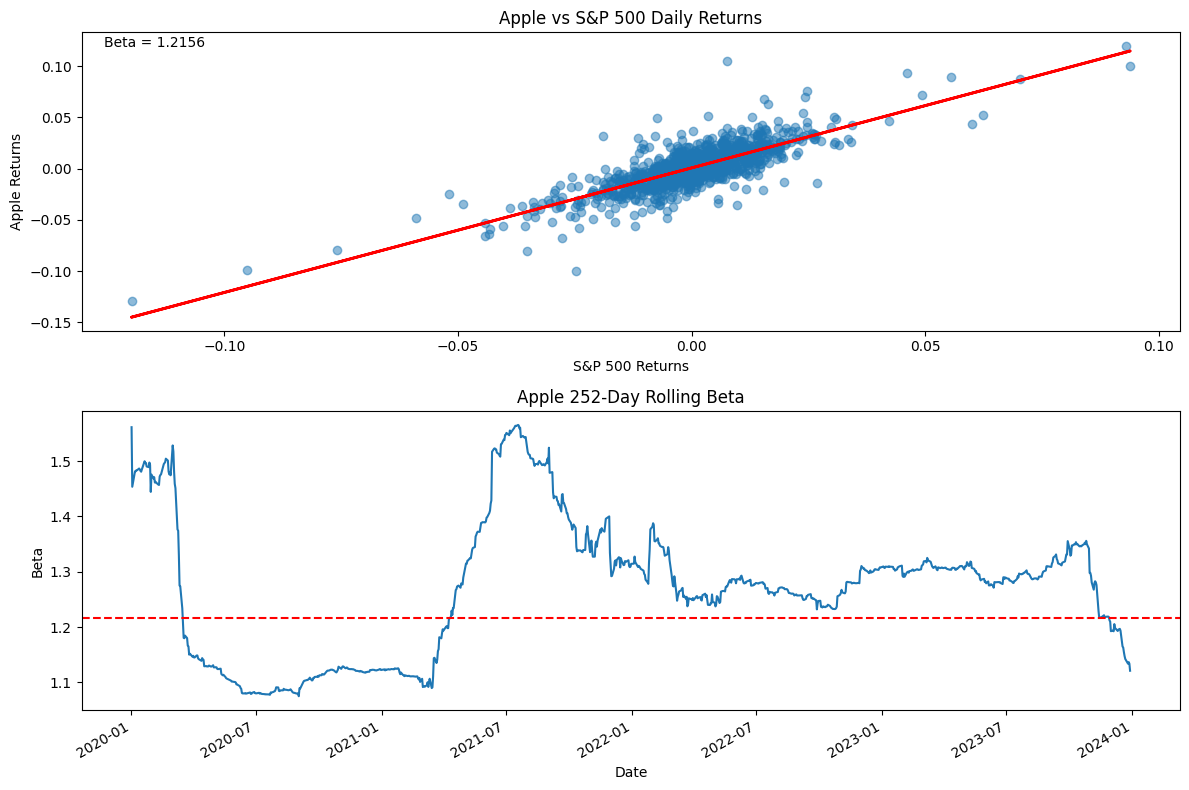

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set the time period
end_date = datetime(2023, 12, 31)
start_date = end_date - timedelta(days=365*5)  # 5 years of data

# Download data
aapl = yf.download('AAPL', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Print available columns to debug
print("Apple dataframe columns:", aapl.columns.tolist())
print("S&P 500 dataframe columns:", sp500.columns.tolist())

# Calculate daily returns using Close price instead of Adj Close
aapl['Returns'] = aapl['Close'].pct_change().dropna()
sp500['Returns'] = sp500['Close'].pct_change().dropna()

# Merge the returns
returns_df = pd.DataFrame({
    'AAPL': aapl['Returns'],
    'SP500': sp500['Returns']
}).dropna()

# Calculate annualized volatility (standard deviation of returns * sqrt(252))
aapl_volatility = returns_df['AAPL'].std() * np.sqrt(252)
market_volatility = returns_df['SP500'].std() * np.sqrt(252)

# Calculate beta
covariance = returns_df.cov().loc['AAPL', 'SP500']
market_variance = returns_df['SP500'].var()
beta = covariance / market_variance

# Calculate correlation
correlation = returns_df.corr().loc['AAPL', 'SP500']

# Verify beta calculation using the correlation formula
beta_using_correlation = correlation * (aapl_volatility / market_volatility) * (1 / np.sqrt(252))

# Print results
print(f"Apple's annualized volatility: {aapl_volatility:.4f} or {aapl_volatility*100:.2f}%")
print(f"Market annualized volatility: {market_volatility:.4f} or {market_volatility*100:.2f}%")
print(f"Beta: {beta:.4f}")
print(f"Correlation: {correlation:.4f}")
print(f"Beta using correlation formula: {beta_using_correlation:.4f}")

# Plot the relationship
plt.figure(figsize=(12, 8))

# Scatter plot of returns
plt.subplot(2, 1, 1)
plt.scatter(returns_df['SP500'], returns_df['AAPL'], alpha=0.5)
plt.xlabel('S&P 500 Returns')
plt.ylabel('Apple Returns')
plt.title('Apple vs S&P 500 Daily Returns')

# Add regression line
x = returns_df['SP500']
y = returns_df['AAPL']
coefficients = np.polyfit(x, y, 1)
line = coefficients[0] * x + coefficients[1]
plt.plot(x, line, 'r-', linewidth=2)
plt.text(0.02, 0.95, f'Beta = {beta:.4f}', transform=plt.gca().transAxes)

# Rolling beta
plt.subplot(2, 1, 2)
rolling_window = 252  # 1 year
rolling_cov = returns_df['AAPL'].rolling(window=rolling_window).cov(returns_df['SP500'])
rolling_var = returns_df['SP500'].rolling(window=rolling_window).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.plot()
plt.axhline(y=beta, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title(f'Apple {rolling_window}-Day Rolling Beta')

plt.tight_layout()
plt.savefig('apple_beta_volatility.png')
plt.show()